In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv('data/coursera_course_details.csv')
df

,Title,Partner,Subject,Description,Rating,Level,Duration,Skills,URL
0,Microsoft Business Analyst Professional Certif...,Microsoft,Business Strategy,Launch your career as a business analyst. Buil...,4.6,Beginner level,3 months,"['Business Process Modeling', 'Pivot Tables An...",https://www.coursera.org/professional-certific...
1,Data Engineering Foundations Specialization,IBM,Data Management,Build the Foundation for a Data Engineering Ca...,4.7,Beginner level,2 months,"['Database Design', 'Database Management Syste...",https://www.coursera.org/specializations/data-...
2,Psychological First Aid,Johns Hopkins University,Psychology,"Instructor: George Everly, Jr., PhD",4.8,NaN,6 hours to complete,"['Trauma Care', 'Crisis Intervention', 'Triage...",https://www.coursera.org/learn/psychological-f...
3,Tableau Business Intelligence Analyst Professi...,Tableau Learning Partner,Data Analysis,Launch your career in Data Analytics. Build in...,4.7,Beginner level,8 months,"['Spatial Data Analysis', 'Data Visualization ...",https://www.coursera.org/professional-certific...
4,Think like a CFO Specialization,IESE Business School,Finance,Instructors: Marc Badia\n+2 more,4.8,Beginner level,1 month,"['Balance Sheet', 'Working Capital', 'Capital ...",https://www.coursera.org/specializations/think...
...,...,...,...,...,...,...,...,...,...
355,IBM Business Analyst Professional Certificate,IBM,Business Essentials,Get job-ready as a Business Analyst. Build the...,4.8,Beginner level,3 months,"['Stakeholder Engagement', 'Business Analytics...",https://www.coursera.org/professional-certific...
356,Adobe Content Creator Professional Certificate,Adobe,Marketing,Launch your career as a content creator.. Buil...,4.7,Beginner level,4 months,"['Storytelling', 'Content Marketing', 'Social ...",https://www.coursera.org/professional-certific...
357,Google IT Automation with Python Professional ...,Google,Support and Operations,"Learn in-demand skills like Python, Git, and I...",4.8,Advanced level,6 months,"['Unit Testing', 'Programming Principles', 'Gi...",https://www.coursera.org/professional-certific...
358,Generative AI Engineering with LLMs Specializa...,IBM,Machine Learning,Advance your ML career with Gen AI and LLMs. M...,4.5,Intermediate level,3 months,"['Text Mining', 'Large Language Modeling', 'Ap...",https://www.coursera.org/specializations/gener...


In [3]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
display(duplicate_rows)

Number of duplicate rows: 0


,Title,Partner,Subject,Description,Rating,Level,Duration,Skills,URL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        360 non-null    object 
 1   Partner      360 non-null    object 
 2   Subject      360 non-null    object 
 3   Description  360 non-null    object 
 4   Rating       356 non-null    float64
 5   Level        342 non-null    object 
 6   Duration     360 non-null    object 
 7   Skills       360 non-null    object 
 8   URL          360 non-null    object 
dtypes: float64(1), object(8)
memory usage: 25.4+ KB


## Handle missing values

📍 from dataframe info, we can see that there are missing/null data in rating and level column

### 1️⃣ Handle rating column

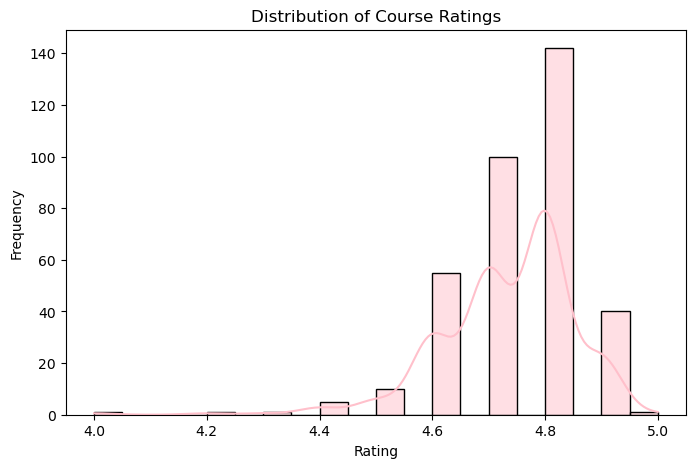

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'].dropna(), kde=True, bins=20, color='pink')
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [6]:
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)

### 2️⃣ Handle level column

In [7]:
print(df['Level'].unique())

['Beginner level' nan 'Intermediate level' 'Advanced level']


In [8]:
mode_val = df['Level'].mode()[0]
df['Level'] = df['Level'].fillna(mode_val)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        360 non-null    object 
 1   Partner      360 non-null    object 
 2   Subject      360 non-null    object 
 3   Description  360 non-null    object 
 4   Rating       360 non-null    float64
 5   Level        360 non-null    object 
 6   Duration     360 non-null    object 
 7   Skills       360 non-null    object 
 8   URL          360 non-null    object 
dtypes: float64(1), object(8)
memory usage: 25.4+ KB


## Replace unusual value

While skimming through the dataset, I noticed that some entries in the description column contain unusual values, specifically, courses without a proper description instead display the instructor's name

In [10]:
print(df['Description'].unique())

['Launch your career as a business analyst. Build job-ready skills for an in-demand career in business analysis in as little as 3 months. No prior experience required to get started.'
 'Build the Foundation for a Data Engineering Career. Develop hands-on experience with Python, SQL, and Relational Databases and master the fundamentals of the Data Engineering ecosystem.'
 'Instructor: George Everly, Jr., PhD'
 'Launch your career in Data Analytics. Build in-demand skills and gain credentials to go from beginner to job-ready in 8 months or less. No degree or prior experience required.'
 'Instructors: Marc Badia\n+2 more'
 'Master Fundamental and Advanced React Concepts. Learn all about React, from basic concepts to advanced practices'
 'Learn Excel Skills for Business. Master Excel to add a highly valuable asset to your employability portfolio.'
 'Steer Your Business to Success. Generate value and demonstrate global impact in four courses.'
 'Copilot Mastery for Leaders. Master Microsoft

For now, i'm gonna replace those values with the corresponding course title

In [11]:
for index, row in df.iterrows():
    if "Instructors:" in row['Description'] or "Instructor:" in row['Description']:
        df.loc[index, 'Description'] = row['Title']

In [12]:
print(df['Description'].unique())

['Launch your career as a business analyst. Build job-ready skills for an in-demand career in business analysis in as little as 3 months. No prior experience required to get started.'
 'Build the Foundation for a Data Engineering Career. Develop hands-on experience with Python, SQL, and Relational Databases and master the fundamentals of the Data Engineering ecosystem.'
 'Psychological First Aid'
 'Launch your career in Data Analytics. Build in-demand skills and gain credentials to go from beginner to job-ready in 8 months or less. No degree or prior experience required.'
 'Think like a CFO Specialization'
 'Master Fundamental and Advanced React Concepts. Learn all about React, from basic concepts to advanced practices'
 'Learn Excel Skills for Business. Master Excel to add a highly valuable asset to your employability portfolio.'
 'Steer Your Business to Success. Generate value and demonstrate global impact in four courses.'
 'Copilot Mastery for Leaders. Master Microsoft 365 Copilot 

## Clean and normalize text

### 1️⃣ Normalize duration into hours

In [13]:
duration_counts = df['Duration'].value_counts()
display(duration_counts)

Duration
Flexible schedule       121
1 month                 102
2 months                 43
3 months                 35
4 months                 20
6 months                  7
5 months                  6
8 months                  3
7 hours to complete       2
9 hours to complete       2
3 hours to complete       2
14 hours to complete      2
7 months                  2
18 hours to complete      2
12 hours to complete      2
2 hours to complete       1
13 hours to complete      1
20 hours to complete      1
6 hours to complete       1
45 hours to complete      1
33 hours to complete      1
9 months                  1
10 hours to complete      1
40 hours to complete      1
Name: count, dtype: int64

In [14]:
def normalize_duration(duration_str):
    if pd.isna(duration_str):
        return np.nan
    duration_str = duration_str.lower().strip()

    if 'hours to complete' in duration_str:
        return int(duration_str.split()[0])
    elif 'month' in duration_str:
        months = int(duration_str.split()[0])
        # assuming 10 hours per week, and 4 week per month
        return months * 40
    elif 'flexible' in duration_str:
        return np.nan  # temporarily NaN, to be replaced later

df['Duration'] = df['Duration'].apply(normalize_duration)

#replace nan with median
median_duration = df['Duration'].median()
df['Duration'] = df['Duration'].fillna(median_duration)
df.rename(columns={'Duration': 'Duration (in hour)'}, inplace=True)
df

,Title,Partner,Subject,Description,Rating,Level,Duration (in hour),Skills,URL
0,Microsoft Business Analyst Professional Certif...,Microsoft,Business Strategy,Launch your career as a business analyst. Buil...,4.6,Beginner level,120.0,"['Business Process Modeling', 'Pivot Tables An...",https://www.coursera.org/professional-certific...
1,Data Engineering Foundations Specialization,IBM,Data Management,Build the Foundation for a Data Engineering Ca...,4.7,Beginner level,80.0,"['Database Design', 'Database Management Syste...",https://www.coursera.org/specializations/data-...
2,Psychological First Aid,Johns Hopkins University,Psychology,Psychological First Aid,4.8,Beginner level,6.0,"['Trauma Care', 'Crisis Intervention', 'Triage...",https://www.coursera.org/learn/psychological-f...
3,Tableau Business Intelligence Analyst Professi...,Tableau Learning Partner,Data Analysis,Launch your career in Data Analytics. Build in...,4.7,Beginner level,320.0,"['Spatial Data Analysis', 'Data Visualization ...",https://www.coursera.org/professional-certific...
4,Think like a CFO Specialization,IESE Business School,Finance,Think like a CFO Specialization,4.8,Beginner level,40.0,"['Balance Sheet', 'Working Capital', 'Capital ...",https://www.coursera.org/specializations/think...
...,...,...,...,...,...,...,...,...,...
355,IBM Business Analyst Professional Certificate,IBM,Business Essentials,Get job-ready as a Business Analyst. Build the...,4.8,Beginner level,120.0,"['Stakeholder Engagement', 'Business Analytics...",https://www.coursera.org/professional-certific...
356,Adobe Content Creator Professional Certificate,Adobe,Marketing,Launch your career as a content creator.. Buil...,4.7,Beginner level,160.0,"['Storytelling', 'Content Marketing', 'Social ...",https://www.coursera.org/professional-certific...
357,Google IT Automation with Python Professional ...,Google,Support and Operations,"Learn in-demand skills like Python, Git, and I...",4.8,Advanced level,240.0,"['Unit Testing', 'Programming Principles', 'Gi...",https://www.coursera.org/professional-certific...
358,Generative AI Engineering with LLMs Specializa...,IBM,Machine Learning,Advance your ML career with Gen AI and LLMs. M...,4.5,Intermediate level,120.0,"['Text Mining', 'Large Language Modeling', 'Ap...",https://www.coursera.org/specializations/gener...


### 2️⃣ Convert string into list on column skills

In [15]:
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               360 non-null    object 
 1   Partner             360 non-null    object 
 2   Subject             360 non-null    object 
 3   Description         360 non-null    object 
 4   Rating              360 non-null    float64
 5   Level               360 non-null    object 
 6   Duration (in hour)  360 non-null    float64
 7   Skills              360 non-null    object 
 8   URL                 360 non-null    object 
dtypes: float64(2), object(7)
memory usage: 25.4+ KB


### 3️⃣ Clean description column

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Dwi Wahyu
[nltk_data]     Lestari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dwi Wahyu
[nltk_data]     Lestari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [19]:
def clean_and_lemmatize(text):
    text = text.lower()

    # remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()

    # remove stopwords
    words = [w for w in words if w not in stop_words]

    # lemmatize
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

In [20]:
df['Skills'] = df['Skills'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [21]:
df['Title'] = df['Title'].apply(clean_and_lemmatize)
df['Description'] = df['Description'].apply(clean_and_lemmatize)
df['Skills'] = df['Skills'].apply(clean_and_lemmatize)
df

,Title,Partner,Subject,Description,Rating,Level,Duration (in hour),Skills,URL
0,microsoft business analyst professional certif...,Microsoft,Business Strategy,launch career business analyst build jobready ...,4.6,Beginner level,120.0,business process modeling pivot table chart bu...,https://www.coursera.org/professional-certific...
1,data engineering foundation specialization,IBM,Data Management,build foundation data engineering career devel...,4.7,Beginner level,80.0,database design database management system big...,https://www.coursera.org/specializations/data-...
2,psychological first aid,Johns Hopkins University,Psychology,psychological first aid,4.8,Beginner level,6.0,trauma care crisis intervention triage stress ...,https://www.coursera.org/learn/psychological-f...
3,tableau business intelligence analyst professi...,Tableau Learning Partner,Data Analysis,launch career data analytics build indemand sk...,4.7,Beginner level,320.0,spatial data analysis data visualization softw...,https://www.coursera.org/professional-certific...
4,think like cfo specialization,IESE Business School,Finance,think like cfo specialization,4.8,Beginner level,40.0,balance sheet working capital capital budgetin...,https://www.coursera.org/specializations/think...
...,...,...,...,...,...,...,...,...,...
355,ibm business analyst professional certificate,IBM,Business Essentials,get jobready business analyst build essential ...,4.8,Beginner level,120.0,stakeholder engagement business analytics busi...,https://www.coursera.org/professional-certific...
356,adobe content creator professional certificate,Adobe,Marketing,launch career content creator build indemand s...,4.7,Beginner level,160.0,storytelling content marketing social medium i...,https://www.coursera.org/professional-certific...
357,google automation python professional certificate,Google,Support and Operations,learn indemand skill like python git automatio...,4.8,Advanced level,240.0,unit testing programming principle github inte...,https://www.coursera.org/professional-certific...
358,generative ai engineering llm specialization,IBM,Machine Learning,advance ml career gen ai llm master essential ...,4.5,Intermediate level,120.0,text mining large language modeling applied ma...,https://www.coursera.org/specializations/gener...


In [22]:
df.to_csv('data/coursera_course_details_preprocessed.csv', index=False)